---
# **Disease prediction.**
---
Cardiovascular disease are among the leading causes of death worldwide, impacting millions of people each year. They are often associated with risk factors such as high blood pressure, diabetes, smoking, and unhealthy lofestyle choises, which contribute to their development and progression.

Maschine learning has emerged as a powerful tool across various fields, particularly in healthcare, where it plays a vital role in diagnosing, predicting, and treating diseases. This report explores the application of ML in predicting cardiovascular diseases, highlightingits potensial to enhace early detection, risk assessment, and patient outcomes.

---
## Exploratory Data Analysis.
---

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import utils as utils
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from ml_models import Disease_Prediction

In [230]:
df = pd.read_csv('cardio_train.csv', sep=';', index_col=0)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [232]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Overview:

The dataset consists of 70,000 records of patient data, with 11 features and one target variable: "cardio." All features are numerical, and no data is missing.

However, the dataset contains several inaccuracies. For example, some records have negative blood pressure values or unrealistically high blood pressure. During the project, all samples with unreasonable BMI, abnormal blood pressure, and other outliers should be discarded.

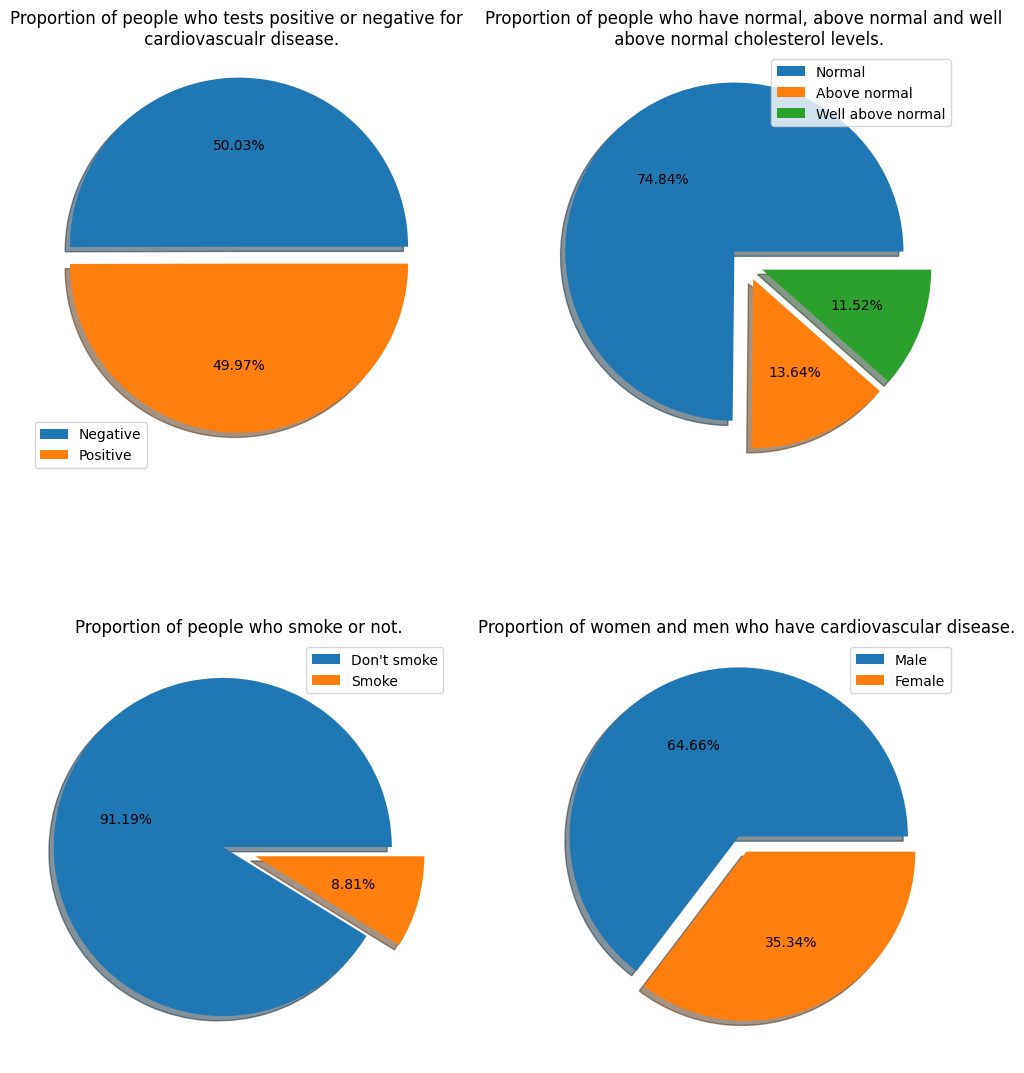

In [233]:
utils.eda_pieplot(df);

### Overview:

From the pie charts, we can conclude that the proportion of people who test positive or negative for cardiovascular disease is almost equal.
Three-quarters of the patients have normal cholesterol levels, while the remaining quarter is split between those with above-normal and well-above-normal cholesterol levels.
Almost 9% of the patients are smokers.
The proportion of men with cardiovascular disease is higher than that of women.

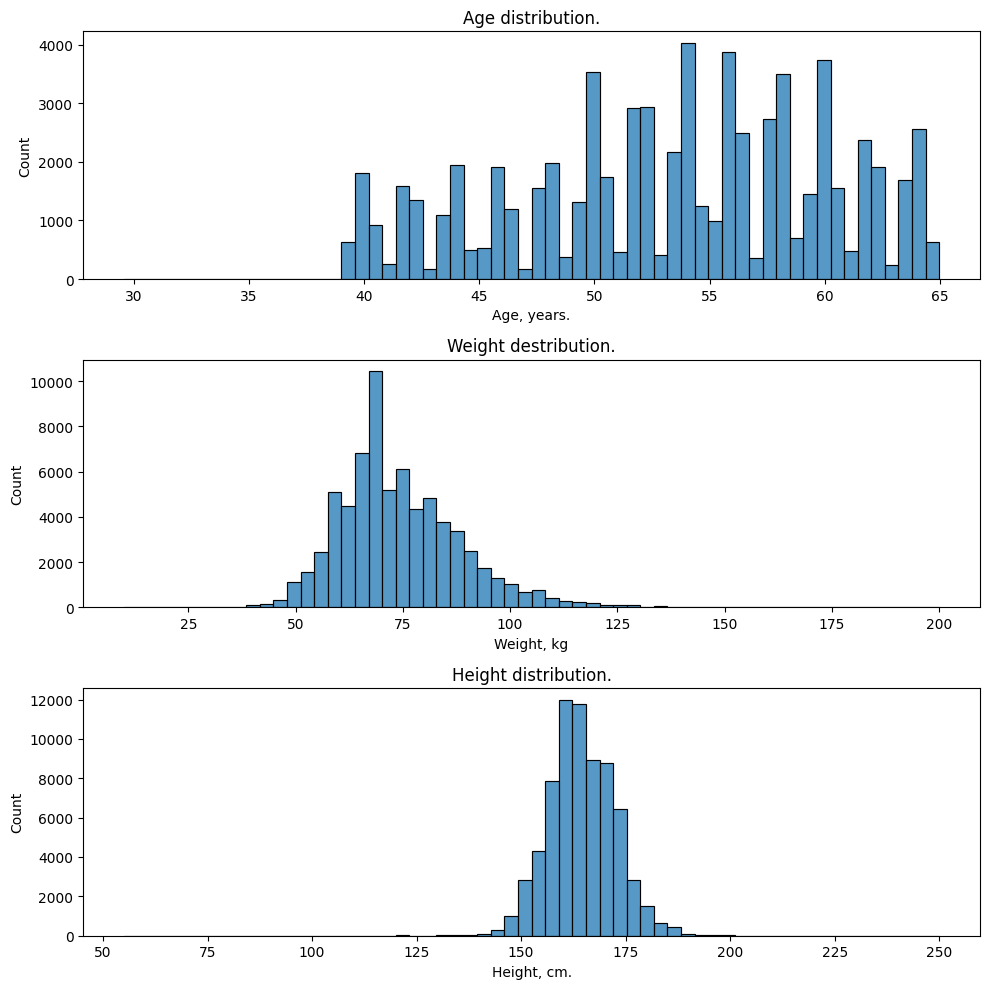

In [234]:
utils.eda_histplot(df);

### Overview:

From the histograms, we can observe the distribution of age, weight, and height.
The age distribution is skewed to the right, indicating a predominance of older individuals in the study. The age range is approximately 37 to 65 years, with peak values representing the most common ages.
The weight distribution is skewed to the left, suggesting that there are more people with lower weights. The peak values indicate the most common weight range.
The height distribution follows a normal distribution, showing the height values of the patients, with peak values representing the most common heights.

---
## Feature Engineering BMI.
---

Body Mass Index (BMI) is a key metric for diagnosing cardiovascular disease, as it serves as an indicator of body fat and is closely linked to multiple risk factors for heart-related conditions. In our dataset, we incorporate BMI as a feature and classify it based on the World Health Organization (WHO) categories:

- Underweight: BMI < 18.5
- Normal weight: 18.5 ≤ BMI < 25
- Overweight: 25 ≤ BMI < 3
- Obesity Class I: 30 ≤ BMI < 35
- Obesity Class II: 35 ≤ BMI < 40
- Obesity Class III: BMI ≥ 40

During our observations, we identify samples with unrealistic BMI values and other outliers that need to be removed. Ensuring accurate and meaningful BMI data is essential for reliable analysis of cardiovascular risk factors.

In [235]:
utils.bmi(df)
df = utils.iqr(df, 'bmi', 3)
df = df[df['bmi'] >= 12]
utils.bmi_cat(df)
df.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_cat
id,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0,Normal range
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,35.0,Obese (class 1)
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,24.0,Normal range
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,29.0,Over-weight
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.0,Normal range


In [236]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,69678.000000,69678.000000,69678.000000,69678.000000,69678.000000,69678.000000,69678.000000,69678.000000,69678.000000,69678.000000,69678.000000,69678.000000,69678.000000
mean,19468.346092,1.350254,164.452352,73.996666,128.784911,96.515973,1.365926,1.225394,0.088278,0.053762,0.803711,0.498938,27.382574
std,2467.555144,0.477053,7.869573,13.895149,154.357725,188.494867,0.679497,0.571071,0.283700,0.225548,0.397192,0.500002,5.023270
min,10798.000000,1.000000,98.000000,28.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000
25%,17663.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,24.000000
50%,19702.500000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.000000
75%,21326.750000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.000000
max,23713.000000,2.000000,250.000000,180.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,48.000000


---
## Feature Engineering Blood Pressure.
---

Blood pressure and cardiovascular diseases are closely related. High blood pressure (hypertension) is one of the leading risk factors for developing cardiovascular diseases, which include various conditions affecting the heart and blood vessels. Prolonged elevated blood pressure significantly increases the risk of heart attacks, strokes, heart failure, and other severe complications.

In our dataset, we are incorporating a blood pressure feature based on the World Health Organization (WHO) classifications:

- Optimal: Systolic below 120 mmHg and diastolic below 80 mmHg.
- Normal: Systolic between 120–129 mmHg and diastolic between 80–84 mmHg.
- High-Normal: Systolic between 130–139 mmHg and diastolic between 85–89 mmHg.
- Hypertension Grade 1: Systolic between 140–159 mmHg or diastolic between 90–99 mmHg.
- Hypertension Grade 2: Systolic between 160–179 mmHg or diastolic between 100–109 mmHg.
- Hypertension Grade 3: Systolic 180 mmHg or higher, or diastolic 110 mmHg or higher.
- Isolated Systolic Hypertension: Systolic 140 mmHg or higher with diastolic below 90 mmHg.

This classification allows us to analyze the relationship between blood pressure and cardiovascular diseases within our dataset. Additionally, we are focusing on cases of abnormal blood pressure and identifying outliers that may impact our analysis.

In [237]:
df = utils.iqr(df, 'ap_hi', 1.5)
df = utils.iqr(df, 'ap_lo', 1.5)
df = df.dropna()
utils.pressure_cat(df)

df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_cat,pressure_cat
id,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0,Normal range,Healthy
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,35.0,Obese (class 1),Stage 2 hypertension
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,24.0,Normal range,Stage 1 hypertension
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,29.0,Over-weight,Stage 2 hypertension
8,21914,1,151,67.0,120,80,2,2,0,0,0,0,29.0,Over-weight,Healthy


In [238]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,63700.000000,63700.000000,63700.000000,63700.000000,63700.000000,63700.000000,63700.000000,63700.000000,63700.000000,63700.000000,63700.000000,63700.000000,63700.000000
mean,19496.984192,1.352637,164.532182,74.289073,126.665212,81.808760,1.364615,1.225573,0.087567,0.053093,0.803171,0.499451,27.468352
std,2456.526027,0.477795,7.797830,13.525922,14.364277,7.704527,0.680566,0.572664,0.282666,0.224220,0.397605,0.500004,4.897392
min,10859.000000,1.000000,120.000000,30.000000,90.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000
25%,17735.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,24.000000
50%,19719.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.000000
75%,21345.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.000000
max,23713.000000,2.000000,198.000000,180.000000,170.000000,105.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,48.000000


---
## Visualization of Diseases Proportions.
---

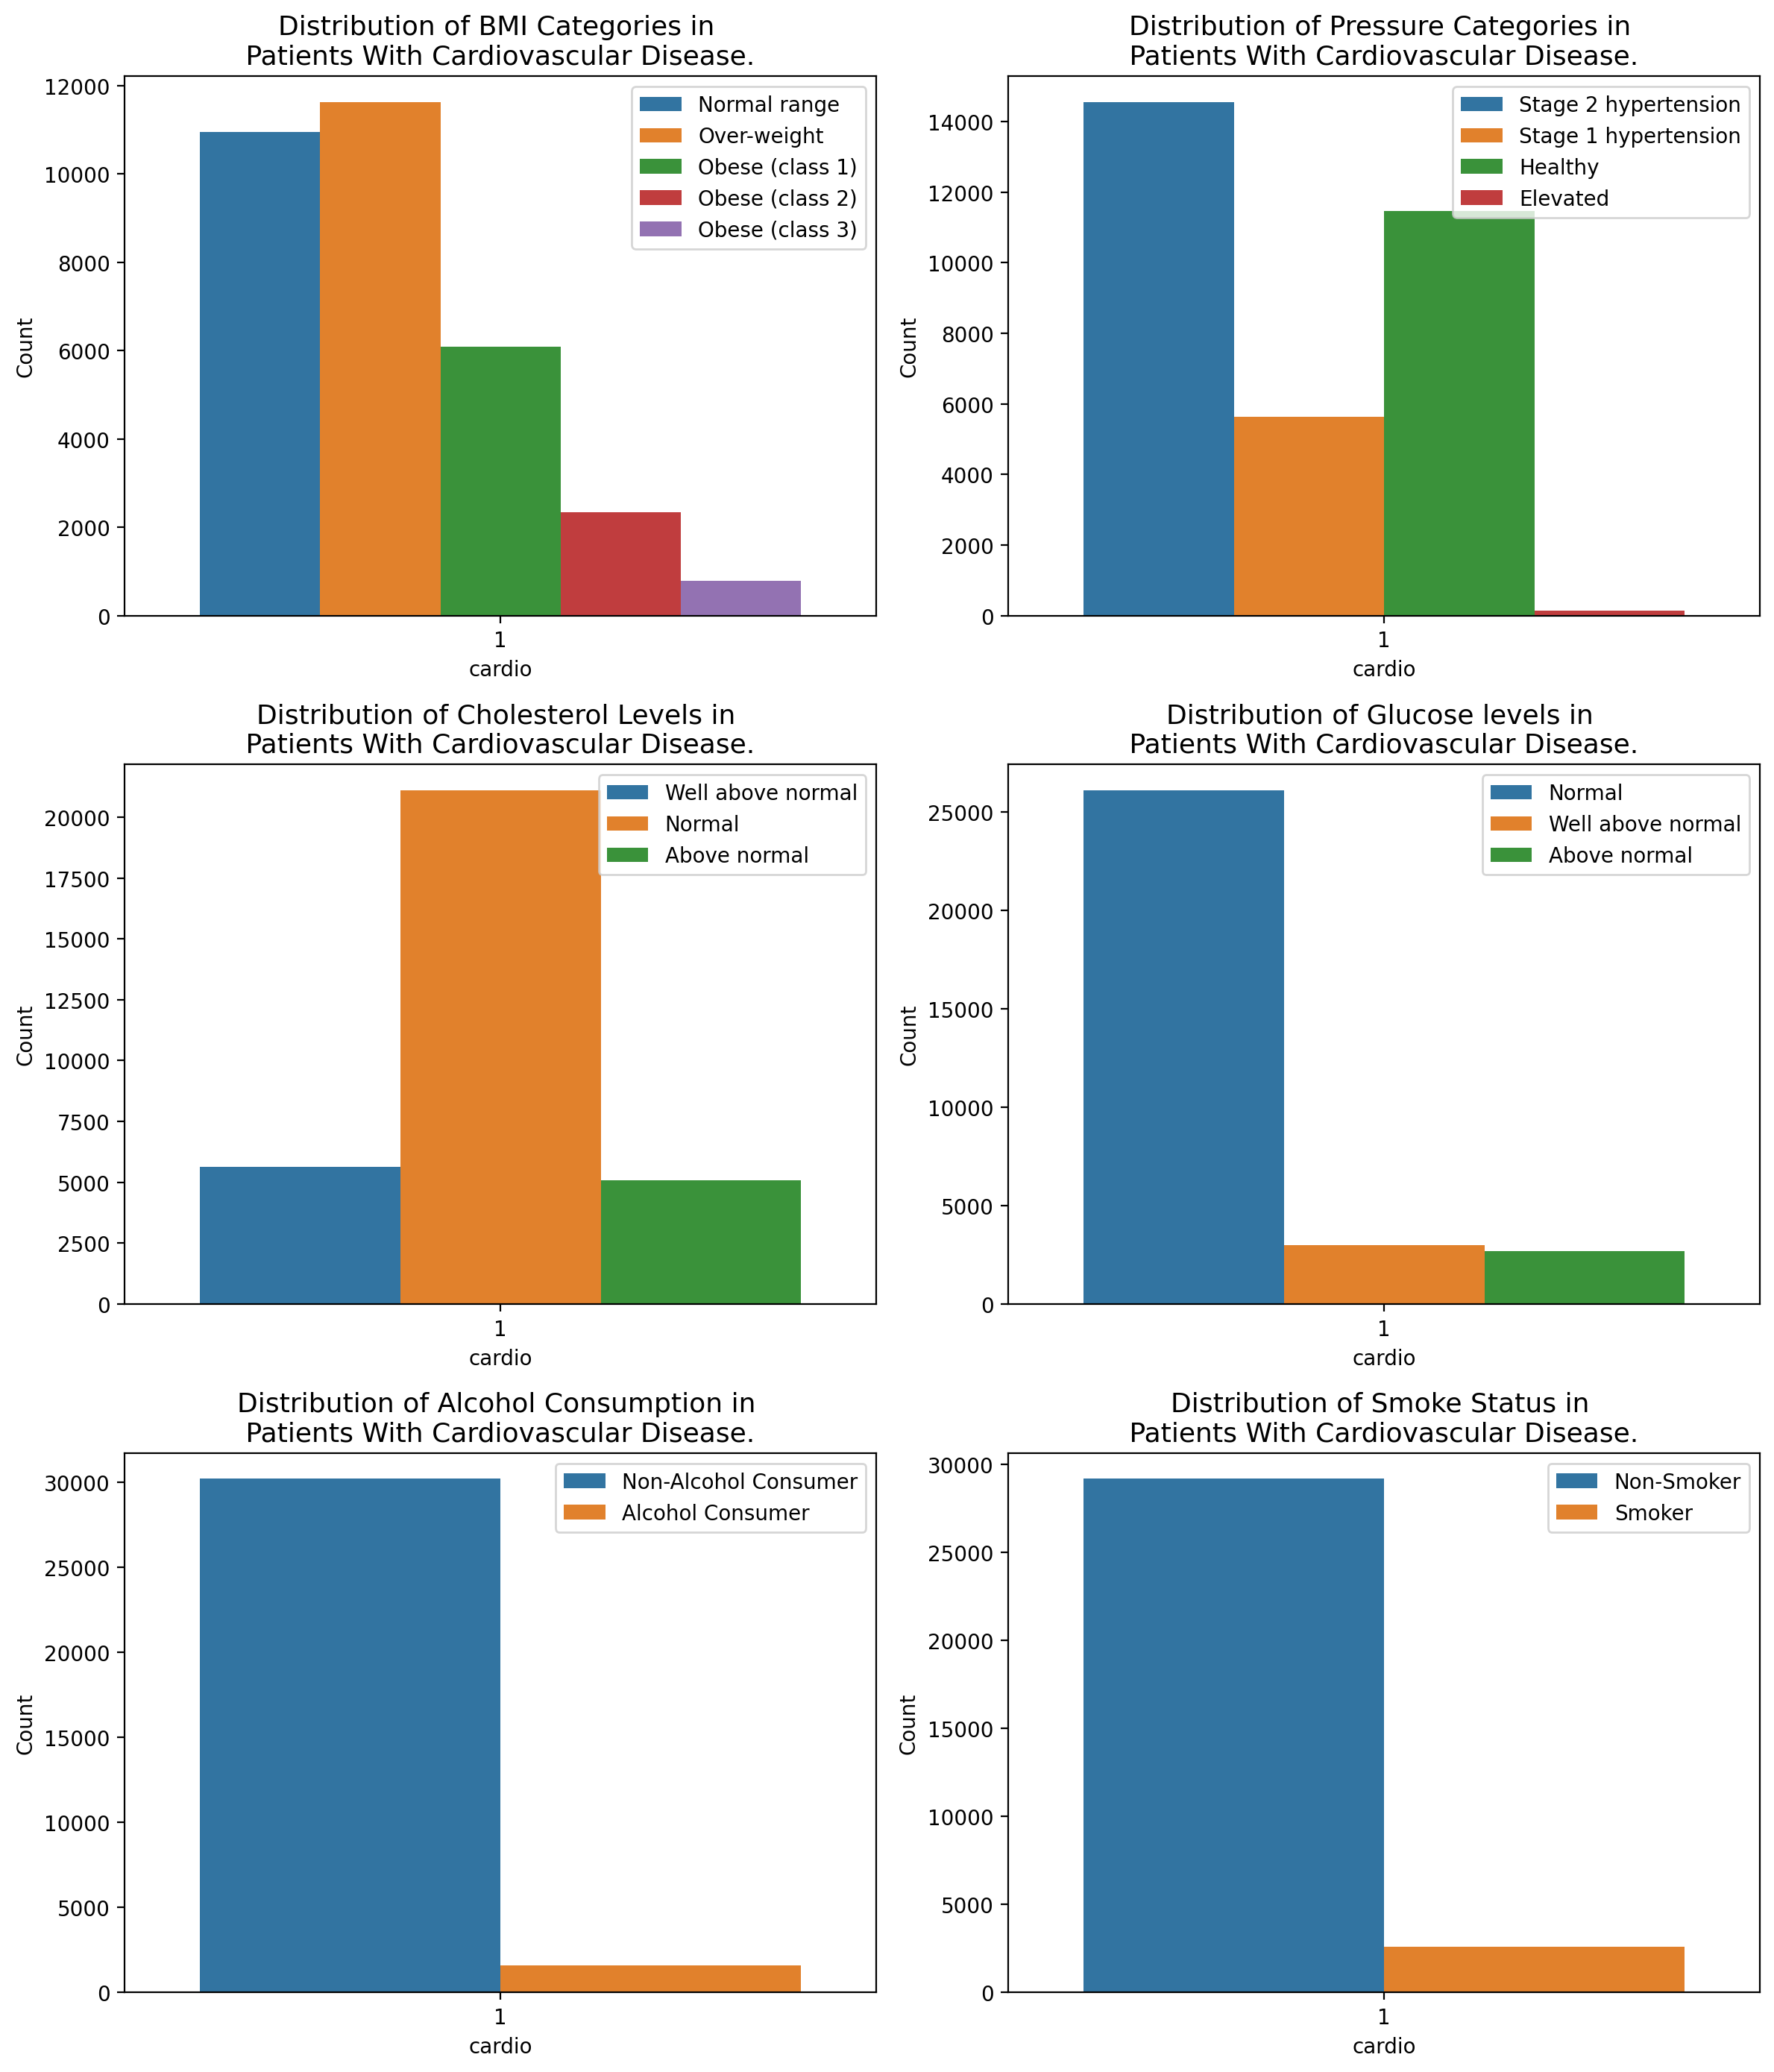

In [239]:
utils.plot_disease(df);


### Overview:
From the bar plots, we can draw a few key conclusions. The group most susceptible to cardiovascular diseases is those within the "Normal range" category, as well as individuals with excess weight.

Patients with high blood pressure are particularly susceptible to cardiovascular diseases, though even healthy individuals are affected. Interestingly, people with normal cholesterol and glucose levels appear to be more vulnerable to cardiovascular conditions, as are non-smokers and those who do not consume alcohol.

---
## Visualization of Correlation.
---

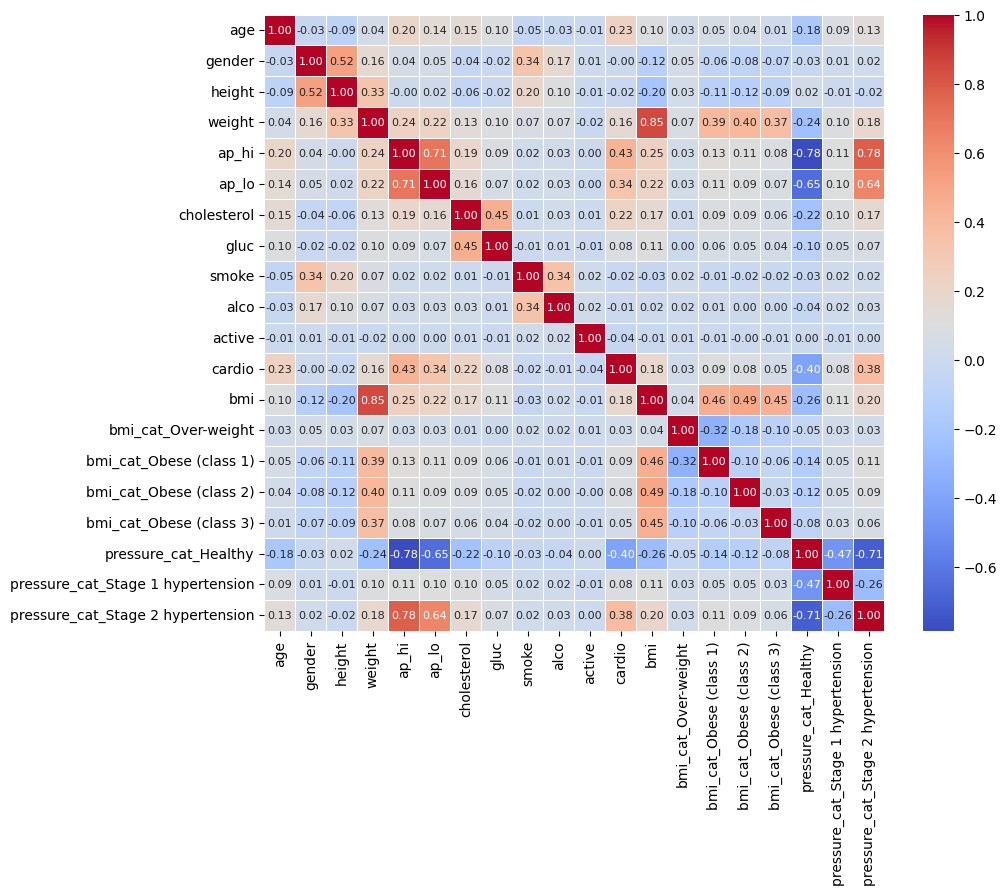

In [240]:
utils.plot_heat(df);

---
## Creating two datasets.
---

In [241]:
df_new = df.copy()

In [242]:
df_new_01 = df_new.drop(columns=['ap_hi', 'ap_lo', 'height', 'weight', 'bmi'])
df_new_01 = pd.get_dummies(df_new_01, columns = ["bmi_cat", 'pressure_cat',  "gender"], drop_first=True)
df_new_01.head()

,age,cholesterol,gluc,smoke,alco,active,cardio,bmi_cat_Over-weight,bmi_cat_Obese (class 1),bmi_cat_Obese (class 2),bmi_cat_Obese (class 3),pressure_cat_Healthy,pressure_cat_Stage 1 hypertension,pressure_cat_Stage 2 hypertension,gender_2
id,,,,,,,,,,,,,,,
0,18393,1,1,0,0,1,0,False,False,False,False,True,False,False,True
1,20228,3,1,0,0,1,1,False,True,False,False,False,False,True,False
2,18857,3,1,0,0,0,1,False,False,False,False,False,True,False,False
3,17623,1,1,0,0,1,1,True,False,False,False,False,False,True,True
8,21914,2,2,0,0,0,0,True,False,False,False,True,False,False,False


In [243]:
df_new_02 = df_new.drop(columns=['bmi_cat', 'pressure_cat', 'height', 'weight'])
df_new_02 = pd.get_dummies(df_new_02, columns = ["gender"], drop_first=True)
df_new_02.head()

,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,gender_2
id,,,,,,,,,,,
0,18393,110,80,1,1,0,0,1,0,22.0,True
1,20228,140,90,3,1,0,0,1,1,35.0,False
2,18857,130,70,3,1,0,0,0,1,24.0,False
3,17623,150,100,1,1,0,0,1,1,29.0,True
8,21914,120,80,2,2,0,0,0,0,29.0,False


## Machine Learning Models.
---

## DF_NEW_01
---

In [244]:
#model = Disease_Prediction(df_new_01, 'cardio')

#### Logistic regression.
---

In [245]:
#model.log_reg()

### KNN
---

In [246]:
#model.knn()

### Random Forest.
---

In [247]:
#model.random_forest()

# DF_NEW_02
---

In [248]:
#model_2 = Disease_Prediction(df_new_02, 'cardio')

### Logistic regression.
---

In [249]:
#model_2.log_reg()

### KNN
---

In [250]:
#model_2.knn()

### Random Forest.
---

In [251]:
#model_2.random_forest()

## Ensemble.
---

## DF_NEW_01

In [252]:
#model.voting_clf()

## DF_NEW_02

In [253]:
#model_2.voting_clf()

## Evaluation.
---